In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import pyreclass

In [2]:
# Reading the gridded radar data.
fname = "data/twp10cpolgrid150.b2.20161210.073000.nc"

with netCDF4.Dataset(fname, "r") as ncid:
    # The 5th slice is the reflectivity at 2.5 km of altitude.
    data2d = np.squeeze(ncid["reflectivity_gridded_dBZ"][:, 5, :, :])
    x = ncid['x'][:]
    y = ncid['y'][:]
    
resolution = (x[1] - x[0]) / 1000

In [3]:
# Get the classification.
wt_class = pyreclass.getWTClass(data2d, res_km=resolution, conv_scale_km=20)

In [4]:
# Plot related stuff.
[X, Y] = np.meshgrid(x, y)
R = np.sqrt(X ** 2 + Y ** 2)
phi = np.linspace(0, 2 * np.pi)

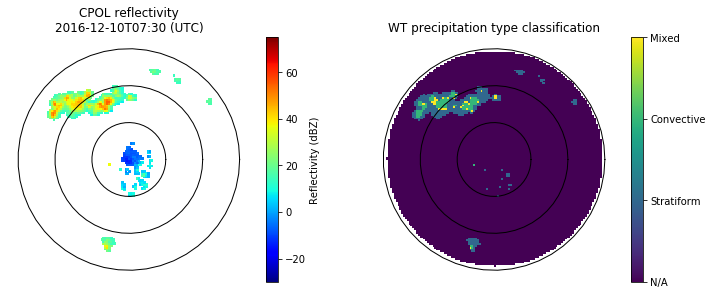

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
ax = ax.ravel()

im0 = ax[0].pcolormesh(x, y, data2d, vmin=-30, vmax=75, cmap='jet')
im1 = ax[1].pcolormesh(x, y, np.ma.masked_where(R > 145e3, wt_class))

ax[0].set_title('CPOL reflectivity\n2016-12-10T07:30 (UTC)')
ax[1].set_title('WT precipitation type classification')

fig.colorbar(im0, ax=ax[0], label='Reflectivity (dBZ)')
cbar = fig.colorbar(im1, ax=ax[1])
cbar.set_ticks(range(4))
cbar.set_ticklabels(['N/A', 'Stratiform', 'Convective', 'Mixed'])

for a in ax:
    a.set_aspect(1)
    a.axis('off')
    [a.plot(r * np.cos(phi), r * np.sin(phi), 'k', linewidth=1) for r in [50e3, 100e3, 150e3]]
    
plt.show()